# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


# План

1. Ознакомиться с данными
2. Провести предварительную обработку данных 
3. Применить фреймворк ICE и RICE для приоритизации гипотез.
4. Сравнить результаты приоритизации гипотез по обоим фреймворкам и объяснить изменения при использовании RICE.
5. Построить графики кумулятивной выручки и среднего чека по группам и сделать выводы.
6. Изучить относительное изменение кумулятивного среднего чека группы B к группе A и сделать выводы.
7. Построить графики кумулятивного среднего количества заказов на посетителя по группам и сделать выводы.
8. Изучить относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A и сделать выводы.
9. Построить точечные графики количества заказов и стоимостей заказов и сделать выводы.
10. Рассчитать перцентили количества и стоимости заказов для определения аномальных значений.
11. Проверить статистическую значимость различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами по "сырым" данным.
12. Проверить статистическую значимость различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами по "очищенным" данным.
13. Принять решение по результатам теста и объяснить его.

## Приоритизация гипотез.
**В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
import math as mth

In [2]:
df=pd.read_csv(r"D:\Загрузки\hypothesis.csv")

In [3]:
pd.options.display.max_colwidth = 130
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE для приоритизации гипотез

In [4]:
df['ICE']=round((df['Impact']*df['Confidence'])/df['Efforts'],2)
print(df[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

### Фреймворк RICE для приоритизации гипотез

In [5]:
df['RICE']=(df['Reach']*df['Impact']*df['Confidence'])/df['Efforts']
print(df[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

**При использовании RICE более приоритетными становятся гипотезы с высоким охватом, даже если их потенциальное влияние или уверенность в этом влиянии ниже, чем у других гипотез. Поэтому видим, что с учетом охвата, наиболее приоритетной гипотезой является 7('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'), так как она имеет максимальную оценку охвата.**

## Анализ A/B-теста

In [6]:
orders= pd.read_csv(r"D:\Загрузки\orders.csv")
visitors = pd.read_csv(r"D:\Загрузки\visitors.csv")

In [7]:
def analysis_df(df):

    print("Info:")
    display(df.info())
    print("\n")

    print("Head:")
    display(df.head())
    print("\n")

    print("Describe:")
    display(df.describe())
    print("\n")

    print("Value Counts:")
    for column in df.columns:
        if df[column].dtype == 'object':
            display(df[column].value_counts().to_frame())
            print("\n")
            print('List of Unique')
            print(df[column].unique())
    print("\n")
    
    print('Duplicates:')
    print(df.duplicated().sum())

In [8]:
analysis_df(orders)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None



Head:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B




Describe:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06




Value Counts:


,date
2019-08-05,48
2019-08-12,47
2019-08-14,47
2019-08-15,46
2019-08-06,46
2019-08-28,45
2019-08-01,45
2019-08-27,44
2019-08-02,44
2019-08-19,43




List of Unique
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']


,group
B,640
A,557




List of Unique
['B' 'A']


Duplicates:
0


In [9]:
analysis_df(visitors)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None



Head:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756




Describe:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000




Value Counts:


,date
2019-08-07,2
2019-08-15,2
2019-08-04,2
2019-08-08,2
2019-08-20,2
2019-08-22,2
2019-08-01,2
2019-08-26,2
2019-08-16,2
2019-08-24,2




List of Unique
['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']


,group
A,31
B,31




List of Unique
['A' 'B']


Duplicates:
0


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# проверим есть ли пользователи, которые попали в обе группы
visitors_a_b = orders.groupby('visitorId')['group'].nunique()
visitors_a_b = visitors_a_b[visitors_a_b >1].index.tolist()
len(visitors_a_b)

58

In [12]:
orders = orders[~orders['visitorId'].isin(visitors_a_b)]

**Изменили тип в колонке date на дату, удалили пользователей, которые попали сразу в две группы.**

### Кумулятивные показатели

#### График кумулятивной выручки по группам

In [13]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers' , 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [14]:
if cumulativeData['date'].min() == orders['date'].min() and cumulativeData['date'].max() == orders['date'].max():
    print('Даты совпадают, датафрейм создан верно')
else:
    print('Ошибка в создании датафрейма')

Даты совпадают, датафрейм создан верно


In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

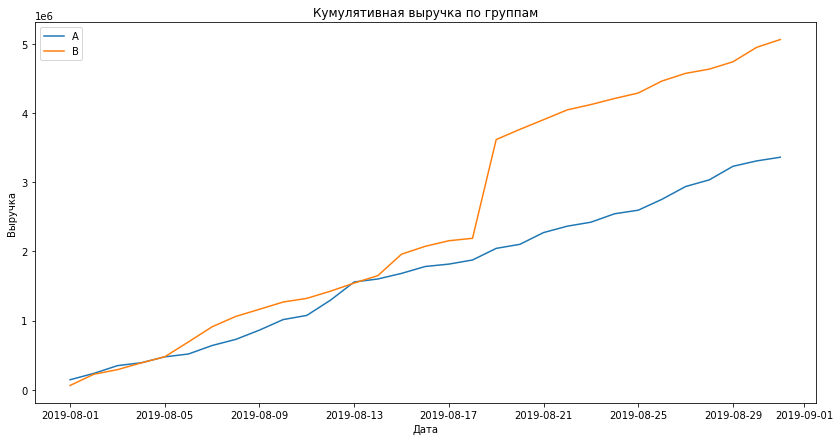

In [16]:
plt.figure(figsize=(14,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.legend() 
plt.show()

**Выручка в обеих группах со временем растет, но в группе В она заметно выше на протяжении всего периода. Также видим резкий рост выручки в группе В 18-19 августа. Скорее всего в группу попал слишком дорогой заказ, либо в этот день было много заказов**

#### График кумулятивного среднего чека по группам

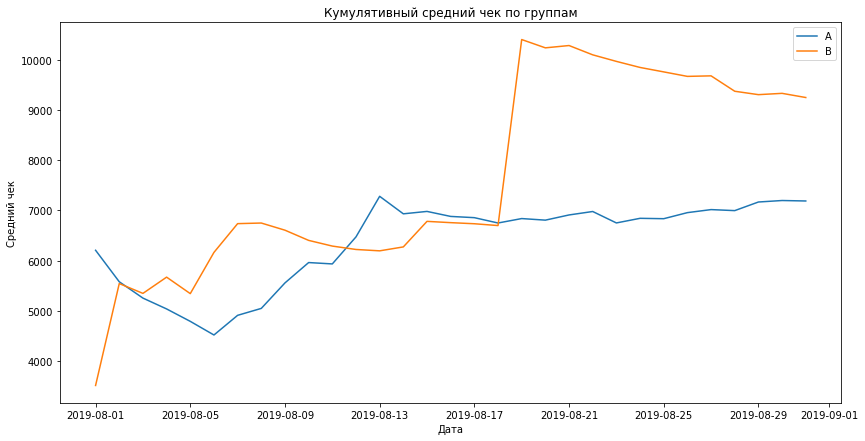

In [17]:
plt.figure(figsize=(14,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.legend() 
plt.show()

**В начале заметны сильные колебания в обеих группах. Видим тот же скачок 18-19 августа. К концу исследуемого периода средний чек обеих групп стабилизируется, в группе В он заметно выше, однако не стоит забывать о сильном пике, который влияет на эту разницу. Также заметно, что средний чек группы В снижается, а группы А растет.**

#### График относительного изменения кумулятивного среднего чека группы B к группе A

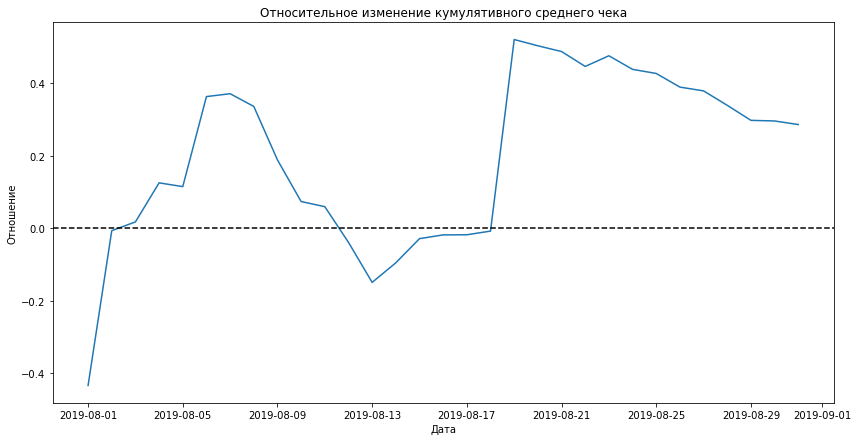

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Отношение')  
plt.show()

**На графике заметны сильные скачки, то есть в данных точно присутствуют аномально дорогие заказы. Видим тот же выброс 18-19 августа, а также видим скачок вниз 13 августа, в этот день средний чек в группе А был выше**

#### График кумулятивного среднего количества заказов на посетителя по группам

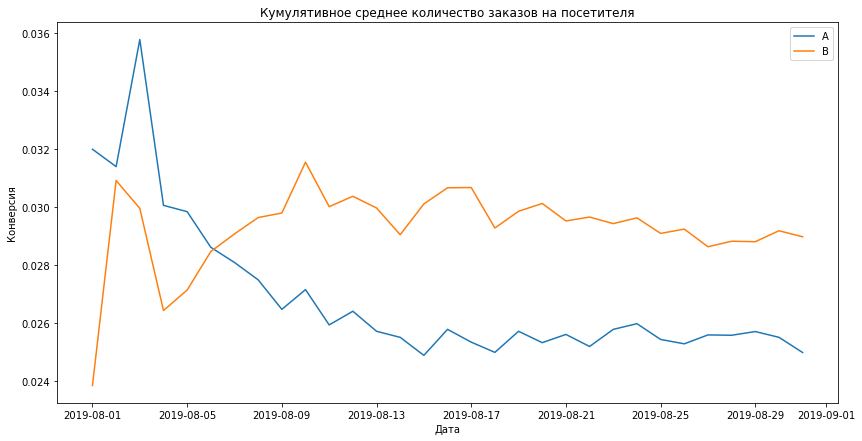

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(14,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Конверсия')  
plt.show()

**Видим, что в начале эксперимента группа А лидировала, однако в скором времени конверсия группы В увеличилась и держалась выше, чем среди пользователей в группе А**

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

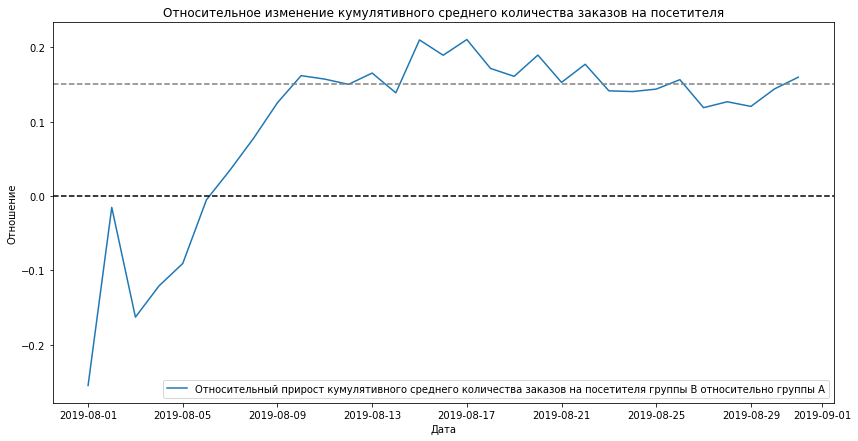

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Отношение')  
plt.show()

**В начале заметны колебания, но после 6 августа видим, что в группе В среднее количество заказов стабильно выше, чем в группе А на 10-15%**

### Выбросы

#### Точечный график количества заказов по пользователям

In [21]:
ordersByUsers = (
    orders.groupby(['visitorId', 'group'], as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'group', 'orders']

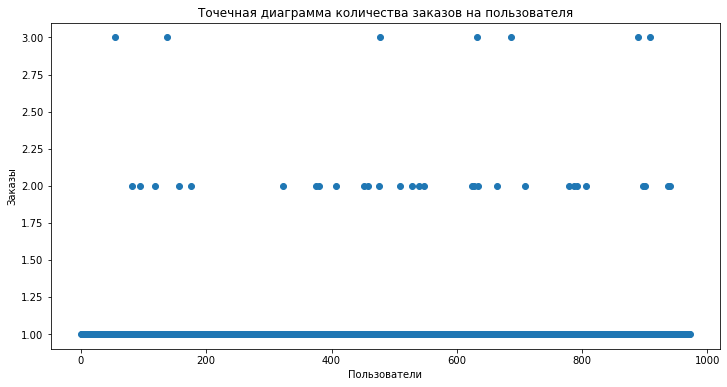

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма количества заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')  
plt.show()

**Большинство пользователей совершало только один заказ. Доля тех, кто совершал 2 заказа и более, судя по графику, мала, однако в цифрах ее пока не оценить**

#### 95-й и 99-й перцентили количества заказов на пользователя


In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 
max_quantity=int(np.percentile(ordersByUsers['orders'], [99]).item())

[1. 2.]


**1 и более заказов совершают лишь 5% пользователей, и лишь 1% пользователей заказывает больше 2 раз.**

**Будем считать 2 заказа на пользователя верхней границей (значение, соответствующее 99-ому перцентилю)**

#### Точечный график стоимостей заказов


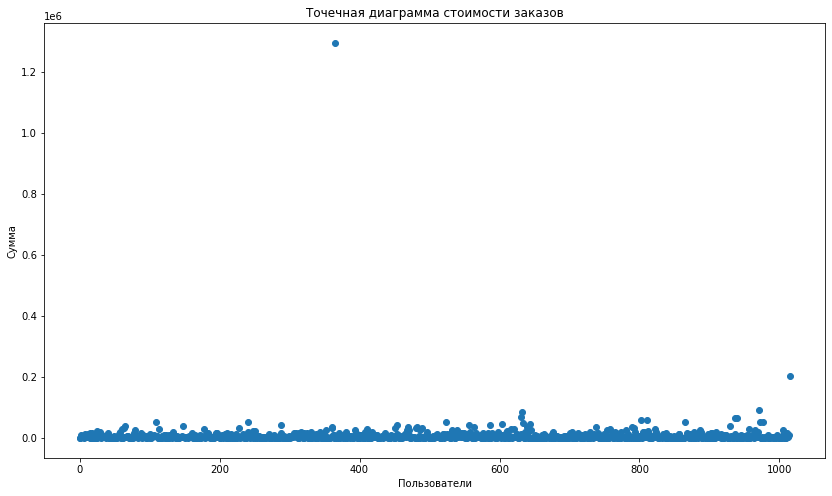

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(14,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма')  
plt.show()

**Два заказа очень сильно выбиваются из общей картины, посмотрим на график без них**

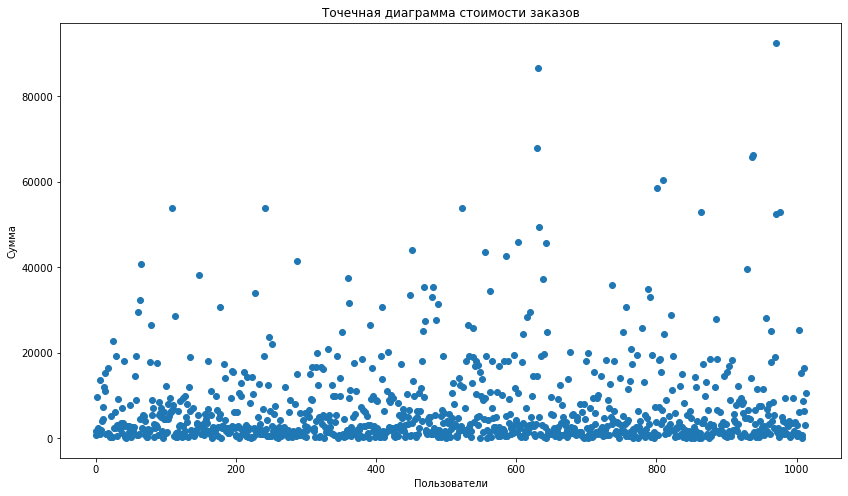

In [25]:
x_values = pd.Series(range(0,len(orders[orders['revenue']<200000]['revenue'])))

plt.figure(figsize=(14,8))
plt.scatter(x_values, orders[orders['revenue']<200000]['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма')  
plt.show()

**Большинство заказов по стоимости не превышает 20.000 рублей, есть аномально дорогие заказы на 200.000 и более 1.200.000**

#### 95-й и 99-й перцентили стоимости заказов. 

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 
max_revenue = int(np.percentile(orders['revenue'], [95]).item())

[26785. 53904.]


**Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей**

**В качестве верхней границы оставим значение, соответствующее 95-ому перцентилю**

### Статистическая значимость

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным


H0: Среднее количество заказов на посетителя в группе А **равно** среднему количеству заказов на посетителя в группе В

H1: Среднее количество заказов на посетителя в группе А **не равно** среднему количеству заказов на посетителя в группе В

In [27]:
ordersA = orders.query('group == "A"').reset_index(drop=True)
ordersB = orders.query('group == "B"').reset_index(drop=True)
ordersByUsersA = ordersByUsers.query('group == "A"').reset_index(drop=True)
ordersByUsersB = ordersByUsers.query('group == "B"').reset_index(drop=True)

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)


print('P-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост:', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.010
Относительный прирост: 0.166


**P-value (0.01) меньше 0.05, значит нулевую гипотезу отвергаем. То есть в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%**

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным


H0: Средний чек в группе А **равен** среднему чеку в группе В

H1: Средний чек в группе А **не равен** среднему чеку в группе В

In [28]:


print('P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост:','{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



P-value: 0.829
Относительный прирост: 0.29


**P-value значительно превышает 0.05, значми отвернуть нулевую гипотезу нельзя. Средние чеки равны, статистически значимых различий между группами нет. Однако средний чек среди группы В больше на 29%, возможно дело в аномально дорогом заказе.**

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным


H0: Среднее количество заказов на посетителя в группе А **равно** среднему количеству заказов на посетителя в группе В

H1: Среднее количество заказов на посетителя в группе А **не равно** среднему количеству заказов на посетителя в группе В

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_quantity]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_quantity]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
58


**Таким образом, у нас 58 аномальных пользователей**

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост:','{0:.2f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.011
Относительный прирост: 0.19


**P-value немного увеличился, но все еще не превышает 0.05, поэтому можем точно сказать, что в среднем количестве заказов между группами есть статистически значимые различия. Также относительное различие между группами увеличилось, что показывает, что в группе В результат лучше**

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным


In [31]:
print('P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print('Относительный прирост:',
    "{0:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

P-value: 0.646
Относительный прирост: -0.05


**Видим, что p-value все еще намного выше 0,05, то есть статистически значимых различий нет. Средний чек теперь отличается на 5%, причем лидирует группа А. Получается на сырых данных на средний чек оказывали сильное влияние выбросы.**

## Решение


**Как видно из полученных результатов среднее количество заказов среди пользователей в группе В выше, чем в группе А. То есть, если цель - увеличить конверсию, то смело можно останавливать тест и признать, что изменения работают и группа В выиграла.
В среднем чеке же не наблюдается различий между группами. Хотя на графики мы видили, что в группе В средний чек намного выше, оказалось, что это результат влияния аномально крупного заказа. Что в целом заметно, так как после него средний чек снижается. 
Продолжать тест не стоит, так как разница в среднем чеке не обнаружится, ведь при условии отсутствия аномальных заказов, величина среднего чека в обеих группах стабилизируется, но не будет сильно отличаться.
Таким образом, следует остановить тест и признать его успешным, конверсия из посетителей в покупателей в группе В выше.**